Analyzing specific stressors and COVID-related vocab

In [1]:
covid_terms = {
    'pandemic_terms': ['pandemic', 'covid', 'coronavirus', 'virus', 'outbreak'],
    'lockdown_terms': ['lockdown', 'quarantine', 'isolation', 'isolating', 'isolated', 'alone'],
    'remote_terms': ['remote', 'virtual', 'online', 'zoom', 'video', 'wfh', 'work from home'],
    'health_safety': ['mask', 'vaccine', 'vaccinated', 'social distancing', 'distance'],
    'therapy_terms': ['therapist', 'therapy', 'counseling', 'telehealth', 'virtual therapy', 'online therapy']
}

In [2]:
def track_specific_terms(df, terms_dict, text_column="full_text"):
    results = {}
    
    for period in df['covid_period'].unique():
        period_data = df[df['covid_period'] == period]
        period_results = {}
        
        # get all text for i-th period
        all_text = ' '.join(period_data[text_column].fillna('').str.lower())
        total_words = len(all_text.split())
        
        for category, terms in terms_dict.items():
            category_count = 0
            term_counts = {}
            
            for term in terms:
                count = all_text.count(term.lower())
                term_counts[term] = count
                category_count += count
                
            period_results[category] = {
                "total_count": category_count,
                "frequency_per_1000": (category_count / total_words * 1000) if total_words > 0 else 0,
                'term_breakdown': term_counts
            }
        
        results[period] = period_results
        
    return results

In [3]:
%store -r reddit_sent_df

In [4]:
covid_tracking = track_specific_terms(reddit_sent_df, covid_terms)

In [5]:
print("COVID-Related Term Frequencies by Period")
print("=" * 60)

for period in ['Pre-COVID', 'During COVID', 'Post-COVID']:
    if period in covid_tracking:
        print(f"\n{period}:")
        for category, data in covid_tracking[period].items():
            print(f"\n  {category}:")
            print(f"    Total mentions: {data['total_count']}")
            print(f"    Per 1000 words: {data['frequency_per_1000']:.2f}")
            
            # Show top terms in category
            top_terms = sorted(data['term_breakdown'].items(), key=lambda x: x[1], reverse=True)[:3]
            if any(count > 0 for _, count in top_terms):
                print("    Most mentioned:")
                for term, count in top_terms:
                    if count > 0:
                        print(f"      - {term}: {count}")


COVID-Related Term Frequencies by Period

Pre-COVID:

  pandemic_terms:
    Total mentions: 3
    Per 1000 words: 0.05
    Most mentioned:
      - virus: 2
      - coronavirus: 1

  lockdown_terms:
    Total mentions: 91
    Per 1000 words: 1.47
    Most mentioned:
      - alone: 81
      - isolated: 8
      - isolation: 1

  remote_terms:
    Total mentions: 26
    Per 1000 words: 0.42
    Most mentioned:
      - online: 14
      - video: 10
      - remote: 1

  health_safety:
    Total mentions: 5
    Per 1000 words: 0.08
    Most mentioned:
      - vaccine: 2
      - distance: 2
      - mask: 1

  therapy_terms:
    Total mentions: 69
    Per 1000 words: 1.12
    Most mentioned:
      - therapist: 38
      - therapy: 30
      - counseling: 1

During COVID:

  pandemic_terms:
    Total mentions: 661
    Per 1000 words: 0.56
    Most mentioned:
      - covid: 378
      - pandemic: 180
      - virus: 71

  lockdown_terms:
    Total mentions: 1298
    Per 1000 words: 1.09
    Most menti

In [6]:
# Specific Stressor Analysis
stressor_terms = {
    "job_related": [
        "job",
        "work",
        "unemployed",
        "fired",
        "laid off",
        "career",
        "boss",
        "workplace",
        "employment",
    ],
    "social_isolation": [
        "alone",
        "lonely",
        "isolated",
        "friends",
        "social",
        "nobody",
        "anyone",
        "loneliness",
    ],
    "health_anxiety": [
        "health",
        "sick",
        "illness",
        "symptoms",
        "doctor",
        "medical",
        "hospital",
        "disease",
    ],
    "financial_stress": [
        "money",
        "bills",
        "rent",
        "financial",
        "afford",
        "broke",
        "debt",
        "pay",
    ],
    "family_issues": [
        "family",
        "parents",
        "mother",
        "father",
        "mom",
        "dad",
        "siblings",
        "relationship",
    ],
    "academic_stress": [
        "school",
        "college",
        "university",
        "exam",
        "study",
        "student",
        "class",
        "grade",
    ],
    # Below are categories made from doing a machine learning clustering algorithm
    # trying to find patterns in the text that I couldn't have come up with
    "health_anxiety": [
        "heart",
        "symptoms",
        "panic attack",
        "panic attacks",
        "scared",
        "pain",
        "health",
        "anxious",
        "attack",
    ],
    "work_stress": ["job", "home", "house", "wfh", "remote", "work"],
    "school_stress": [
        "school",
        "parents",
        "mom",
        "dad",
        "remote school",
        "class",
        "online class",
    ],
    "burnout": ["tired", "anymore", "hate", "exhausted", "fucking tired", "end"],
}

In [7]:
stressor_tracking = track_specific_terms(reddit_sent_df, stressor_terms)

In [9]:
print("\n\nStressor-Related Term Frequencies by Period")
print("=" * 60)

for period in ['Pre-COVID', 'During COVID', 'Post-COVID']:
    if period in stressor_tracking:
        print(f"\n{period}:")
        for category, data in stressor_tracking[period].items():
            print(f"\n  {category}:")
            print(f"    Total mentions: {data['total_count']}")
            print(f"    Per 1000 words: {data['frequency_per_1000']:.2f}")
            
            # Show top terms in category
            top_terms = sorted(data['term_breakdown'].items(), key=lambda x: x[1], reverse=True)[:3]
            if any(count > 0 for _, count in top_terms):
                print("    Most mentioned:")
                for term, count in top_terms:
                    if count > 0:
                        print(f"      - {term}: {count}")




Stressor-Related Term Frequencies by Period

Pre-COVID:

  job_related:
    Total mentions: 264
    Per 1000 words: 4.27
    Most mentioned:
      - work: 165
      - job: 79
      - career: 8

  social_isolation:
    Total mentions: 398
    Per 1000 words: 6.43
    Most mentioned:
      - friends: 132
      - anyone: 102
      - alone: 81

  health_anxiety:
    Total mentions: 370
    Per 1000 words: 5.98
    Most mentioned:
      - health: 78
      - attack: 55
      - scared: 49

  financial_stress:
    Total mentions: 185
    Per 1000 words: 2.99
    Most mentioned:
      - rent: 96
      - money: 30
      - pay: 24

  family_issues:
    Total mentions: 352
    Per 1000 words: 5.69
    Most mentioned:
      - family: 87
      - mom: 78
      - relationship: 47

  academic_stress:
    Total mentions: 174
    Per 1000 words: 2.81
    Most mentioned:
      - school: 81
      - class: 20
      - college: 17

  work_stress:
    Total mentions: 354
    Per 1000 words: 5.72
    Most men

## Visualize Changes in Stressors Over Time

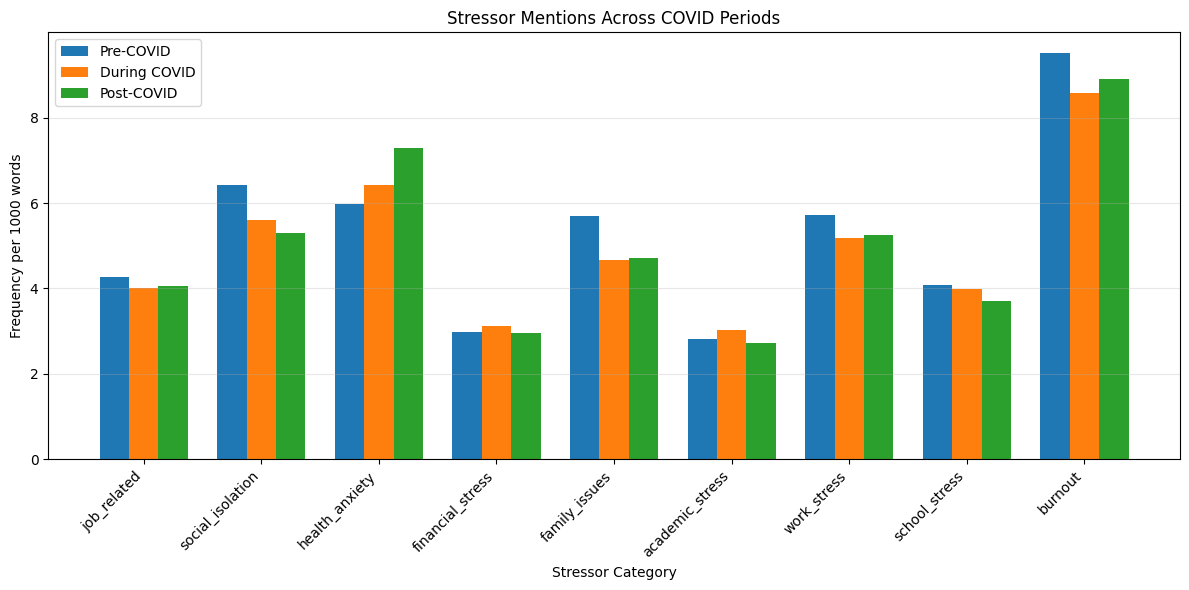

In [10]:
import matplotlib.pyplot as plt
import numpy as np

categories = list(stressor_terms.keys())
periods = ["Pre-COVID", "During COVID", "Post-COVID"]

# Create matrix of frequencies
freq_matrix = []
for category in categories:
    row = []
    for period in periods:
        if period in stressor_tracking:
            freq = stressor_tracking[period][category]["frequency_per_1000"]
            row.append(freq)
        else:
            row.append(0)
    freq_matrix.append(row)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(categories))
width = 0.25

for i, period in enumerate(periods):
    values = [freq_matrix[j][i] for j in range(len(categories))]
    ax.bar(x + i * width, values, width, label=period)

ax.set_xlabel("Stressor Category")
ax.set_ylabel("Frequency per 1000 words")
ax.set_title("Stressor Mentions Across COVID Periods")
ax.set_xticks(x + width)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()